# Tutorial - Time Series Forecasting - Holt-Winters

The goal is to forecast time series with the Holt-Winters Approach. 1) JetRail Commuter, 2) Air Passengers, 3) Function Holt-Winters with Air Passengers, and 5) Function Holt-Winters with Wine Sales.

References Analytics Vidhya - https://www.analyticsvidhya.com/blog/2018/02/time-series-forecasting-methods/

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import datetime

In [3]:
# Load File
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/JetRail%20Avg%20Hourly%20Traffic%20Data%20-%202012-2013.csv'
df = pd.read_csv(url)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 3 columns):
Datetime    494 non-null object
ID          494 non-null float64
Count       494 non-null float64
dtypes: float64(2), object(1)
memory usage: 11.7+ KB


In [4]:
df.Datetime = pd.to_datetime(df.Datetime,format='%Y-%m-%d %H:%M') 
df.index = df.Datetime

# Holt-Winters Approach with JetRail 

This method consists of decomposing Time Series into it’s components (Trend, Seasonality and Residual). The Holt-Winters seasonal method will use the forecast equation and three smoothing equations — one for the level, one for trend and one for the seasonal component.

The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.

In [5]:
#Split Train Test
import math
total_size=len(df)
split = 10392 / 11856
train_size=math.floor(split*total_size)
train=df.head(train_size)
test=df.tail(len(df) -train_size)

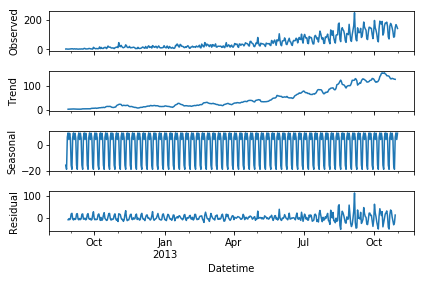

In [6]:
#Decomposing Time Series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [8]:
# Create prediction table
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']),seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))

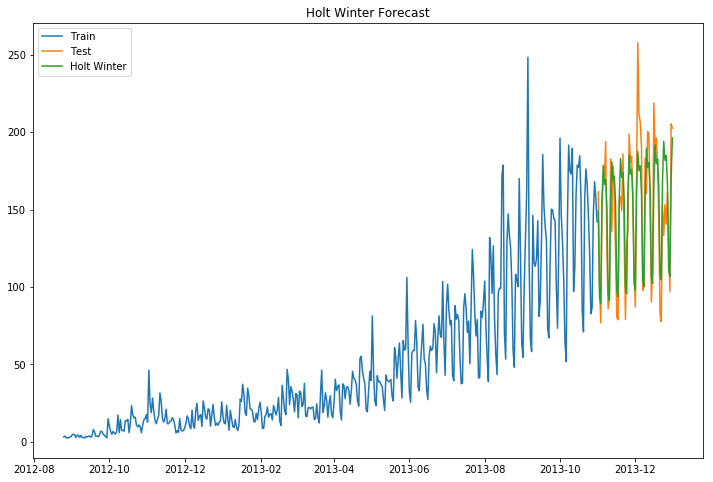

In [9]:
#Plotting data
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

# RMSE Calculation

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.Holt_Winter))
print('RMSE = '+str(rms))

RMSE = 23.961492566159787


# Holt-Winters Approach Approach with Air Passagers 

(Trend = Multiplicative, Seasonal = 12 periods & Multiplicative)

In [24]:
# Subsetting
url = 'https://raw.githubusercontent.com/tristanga/Machine-Learning/master/Data/International%20Airline%20Passengers.csv'
df = pd.read_csv(url, sep =";")
df.info()
df.Month = pd.to_datetime(df.Month,format='%Y-%m')
df.index = df.Month
#df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [25]:
#Creating train and test set 
import math
total_size=len(df)
train_size=math.floor(0.7*total_size) #(70% Dataset)
train=df.head(train_size)
test=df.tail(len(df) -train_size)
#train.info()
#test.info()

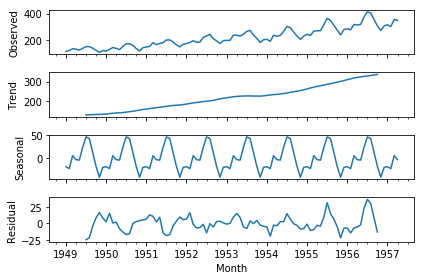

In [26]:
#Decomposing Time Series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Passengers).plot()
result = sm.tsa.stattools.adfuller(train.Passengers)
plt.show()

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, Holt
y_hat = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Passengers']),seasonal_periods=12,trend='mul', seasonal='mul',).fit()
y_hat['Holt_Winter'] = fit1.forecast(len(test))
y_hat.describe()

,Passengers,Holt_Winter
count,44.000000,44.000000
mean,421.068182,421.240881
std,77.330279,66.252333
min,305.000000,293.368041
25%,359.750000,375.792735
50%,406.500000,416.614890
75%,465.500000,465.732681
max,622.000000,582.557033


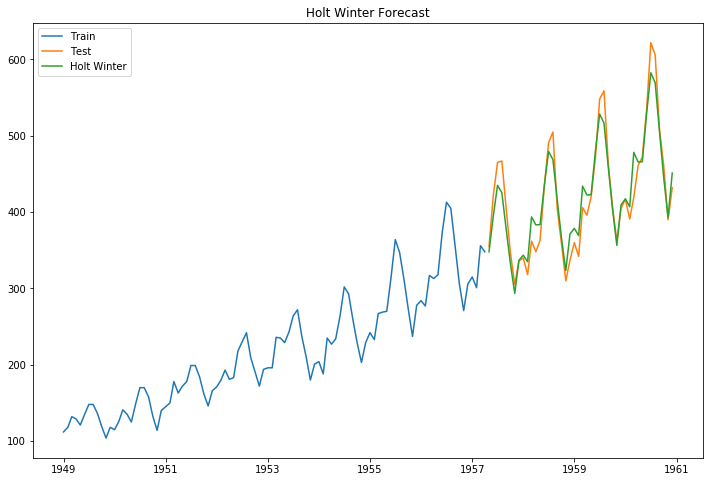

In [34]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
plt.legend(loc='best')
plt.title("Holt Winter Forecast")
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Passengers, y_hat.Holt_Winter))
print('RMSE = '+str(rms))

RMSE = 22.738527674950813


# Function Holt-Winters Approach with variables

In [36]:
def Holt_Winter_forecasting(mydf,colval,split, seasonal_per, trend, seasonal):
    #print(split)
    import math
    from statsmodels.tsa.api import Holt
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    global y_hat, train, test
    total_size=len(mydf)
    train_size=math.floor(split*total_size) #(70% Dataset)
    train=mydf.head(train_size)
    test=mydf.tail(len(mydf) -train_size)
    y_hat = test.copy()
    fit1 = ExponentialSmoothing(np.asarray(train[colval]),seasonal_periods=seasonal_per,trend=trend, seasonal=seasonal,).fit()
    y_hat['Holt_Winter'] = fit1.forecast(len(test))
    plt.figure(figsize=(12,8))
    plt.plot(train.index, train[colval], label='Train')
    plt.plot(test.index,test[colval], label='Test')
    plt.plot(y_hat.index,y_hat['Holt_Winter'], label='Holt Winter')
    plt.legend(loc='best')
    plt.title("Holt Winter Forecast")
    plt.show()
    rms = sqrt(mean_squared_error(test[colval], y_hat.Holt_Winter))
    print('RMSE = '+str(rms))

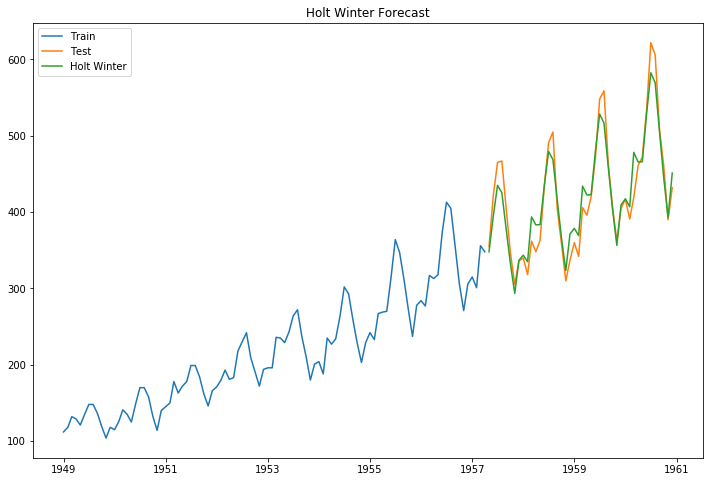

RMSE = 22.738527674950813


In [41]:
Holt_Winter_forecasting(df,'Passengers',0.7,12,'mul','mul')

# Testing Function Holt-Winters Approach with Wine Dataset 

(Trend = Additive, Seasonal = 12 periods & Additive)

In [54]:
url = 'https://raw.githubusercontent.com/tristanga/Data-Cleaning/master/Converting%20Time%20Series/Wine_Sales_R_Dataset.csv'
df = pd.read_csv(url)
df.info()
df.Date = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df.Date

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
Date     176 non-null object
Sales    176 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


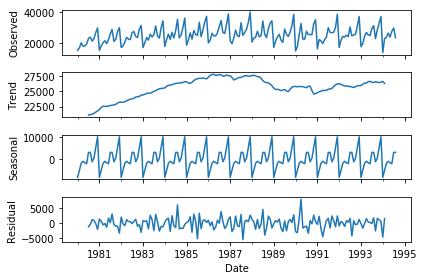

In [55]:
#Decomposing Time Series
import statsmodels.api as sm
sm.tsa.seasonal_decompose(df.Sales).plot()
result = sm.tsa.stattools.adfuller(df.Sales)
plt.show()

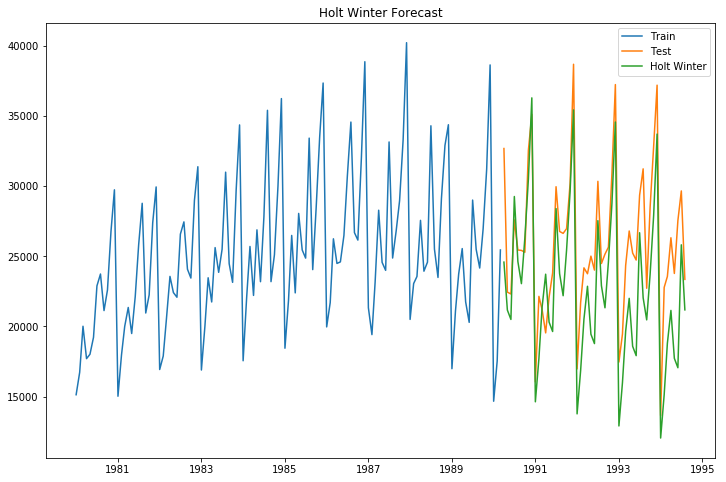

RMSE = 4201.063071882888


In [56]:
Holt_Winter_forecasting(df,'Sales',0.7,12,'add','add')